In [43]:
# See benchmark_consts.rs
N_MESSAGES_PER_THREAD = 2 << 15

In [20]:
thread_counts = [1, 2, 4, 8, 16, 32]


def to_ns(s: str) -> float:
    v = float(s[:-2])
    suffix = s[-2:]
    if suffix == "ns":
        v *= 1
    elif suffix == "μs":
        v *= 1000
    elif suffix == "ms":
        v *= 1000 * 1000
    else:
        v = float(s[:-1])
        v *= 1000 * 1000 * 1000
    return v


mpmc_oq_produce_tp = []
rigtorp_produce_tp = []

for tc in thread_counts:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[producer")
        ]
        assert len(values) == tc
        return max(values)
    with open(f"mpmc_oq_produce_throughput_{tc}.log") as f:
        mpmc_oq_produce_tp.append(get_values_from_file(f))
    with open(f"rigtorp_produce_throughput_{tc}.log") as f:
        rigtorp_produce_tp.append(get_values_from_file(f))


In [8]:
import numpy as np
import matplotlib.pyplot as plt

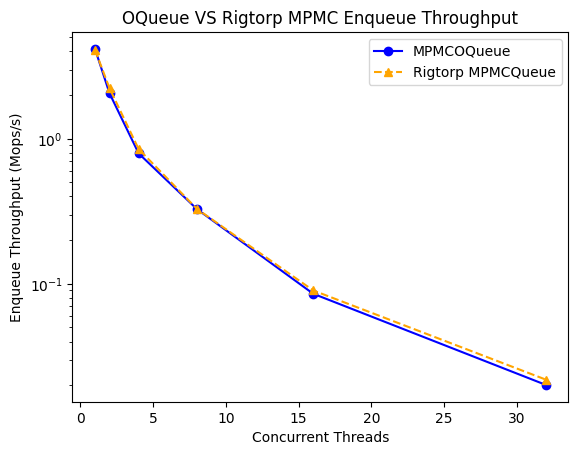

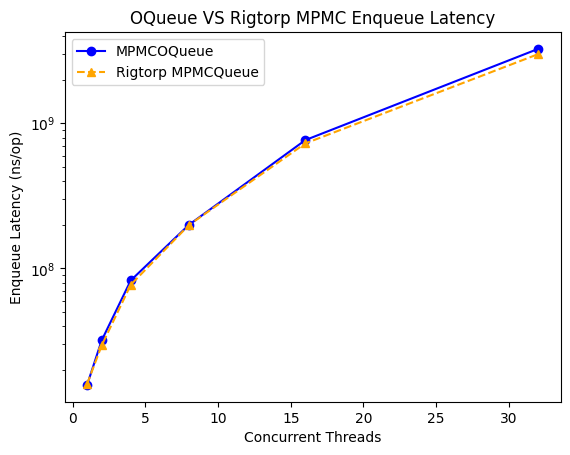

In [29]:
fig = plt.figure()
plt.plot(thread_counts, [N_MESSAGES_PER_THREAD * (10 ** 3) / v for v in mpmc_oq_produce_tp], marker='o', label="MPMCOQueue", color="blue")
plt.plot(thread_counts, [N_MESSAGES_PER_THREAD * (10 ** 3) / v for v in rigtorp_produce_tp], marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Throughput (Mops/s)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Throughput")
plt.show()

fig = plt.figure()
plt.plot(thread_counts, mpmc_oq_produce_tp, marker='o', label="MPMCOQueue", color="blue")
plt.plot(thread_counts, rigtorp_produce_tp, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Latency (ns/op)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Latency")
plt.show()

In [40]:
mpmc_oq_consume_tp = []
rigtorp_consume_tp = []

for tc in thread_counts:
    def get_values_from_file(f):
        lines = f.readlines()
        values = [
            to_ns(line.split()[-1])
            for line in lines
            if line.startswith("[consumer")
        ]
        assert len(values) == tc
        return max(values)
    with open(f"mpmc_oq_consume_bench_throughput_{tc}.log") as f:
        mpmc_oq_consume_tp.append(get_values_from_file(f))
    with open(f"rigtorp_consume_bench_throughput_{tc}.log") as f:
        rigtorp_consume_tp.append(get_values_from_file(f))


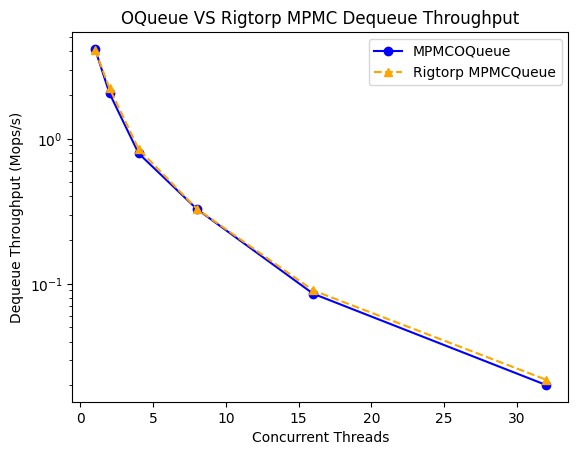

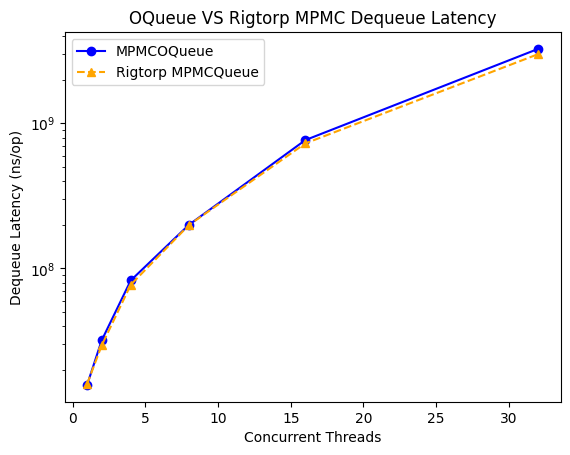

In [44]:
fig = plt.figure()
plt.plot(thread_counts, [N_MESSAGES_PER_THREAD * (10 ** 3) / v for v in mpmc_oq_produce_tp], marker='o', label="MPMCOQueue", color="blue")
plt.plot(thread_counts, [N_MESSAGES_PER_THREAD * (10 ** 3) / v for v in rigtorp_produce_tp], marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Dequeue Throughput (Mops/s)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Throughput")
plt.show()

fig = plt.figure()
plt.plot(thread_counts, mpmc_oq_produce_tp, marker='o', label="MPMCOQueue", color="blue")
plt.plot(thread_counts, rigtorp_produce_tp, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Dequeue Latency (ns/op)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Latency")
plt.show()